In [2]:
# %% [markdown]
# # ALU Student Performance Prediction
# **Dataset**: ALU Students Academic Performance Survey
#
# **Mission**: Predict student GPA based on academic behaviors and expectations

# %%
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib



In [3]:
# %%
# Load and preprocess data (upload your CSV first)
# Sample data structure based on codebook:
data = {
    'Sex': ['Male', 'Female', 'Male', 'Female'],
    'Age': [20, 21, 19, 22],
    'Major': ['CS', 'BA', 'MIS', 'CS'],
    'Current_level': ['Sophomore', 'Junior', 'Freshmen', 'Senior'],
    'Expectations': [4, 3, 5, 2],
    'Reading_Volume': [3, 2, 4, 3],
    'Meet_deadlines': [4, 3, 5, 2],
    'Work_quality': [4, 3, 5, 2],
    'Level_understanding': [2, 3, 1, 4],
    'Study_hours_before': [15, 20, 10, 25],
    'Study_hours_after': [25, 30, 20, 35],
    'Stress_Level': [3, 4, 2, 5],
    '2023_24_GPA': [3.5, 3.2, 3.8, 2.9]
}

df = pd.DataFrame(data)

# %%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4 non-null      object 
 1   Age                  4 non-null      int64  
 2   Major                4 non-null      object 
 3   Current_level        4 non-null      object 
 4   Expectations         4 non-null      int64  
 5   Reading_Volume       4 non-null      int64  
 6   Meet_deadlines       4 non-null      int64  
 7   Work_quality         4 non-null      int64  
 8   Level_understanding  4 non-null      int64  
 9   Study_hours_before   4 non-null      int64  
 10  Study_hours_after    4 non-null      int64  
 11  Stress_Level         4 non-null      int64  
 12  2023_24_GPA          4 non-null      float64
dtypes: float64(1), int64(9), object(3)
memory usage: 548.0+ bytes
None

Missing values:
 Sex                    0
Age                    0
Major    

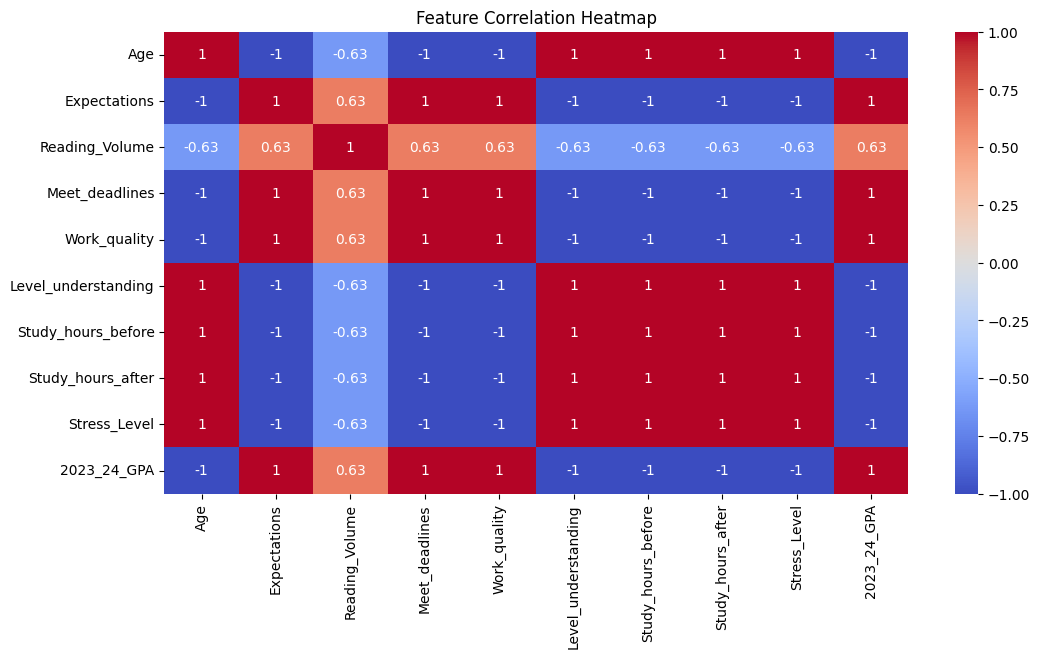

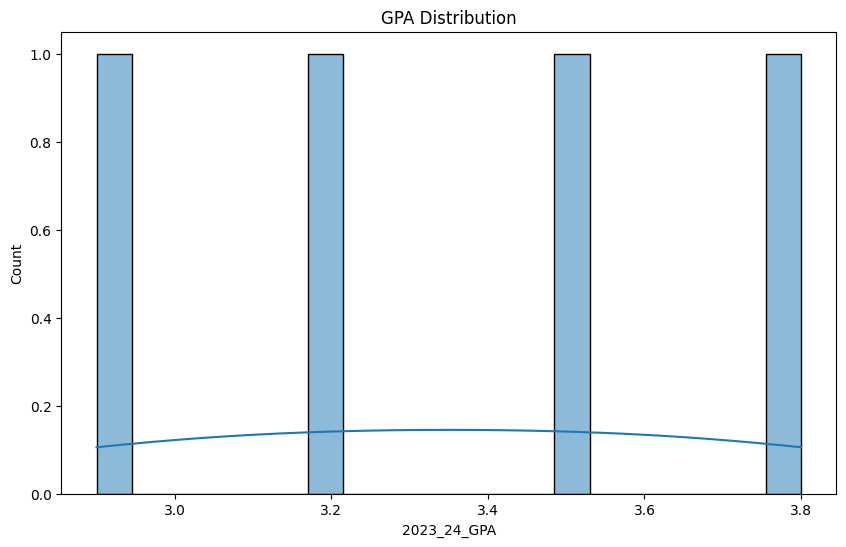

In [4]:
# Data Exploration
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Visualizations
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['2023_24_GPA'], bins=20, kde=True)
plt.title('GPA Distribution')
plt.show()



In [5]:
# %%
# Preprocessing
target = '2023_24_GPA'
features = ['Age', 'Expectations', 'Reading_Volume', 'Meet_deadlines',
            'Work_quality', 'Level_understanding', 'Study_hours_before',
            'Study_hours_after', 'Stress_Level']

# Encode categorical variables if needed
label_encoders = {}
for col in ['Sex', 'Major', 'Current_level']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save encoders for API
joblib.dump(label_encoders, 'label_encoders.pkl')



['label_encoders.pkl']

In [6]:
# %%
# Train-test split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


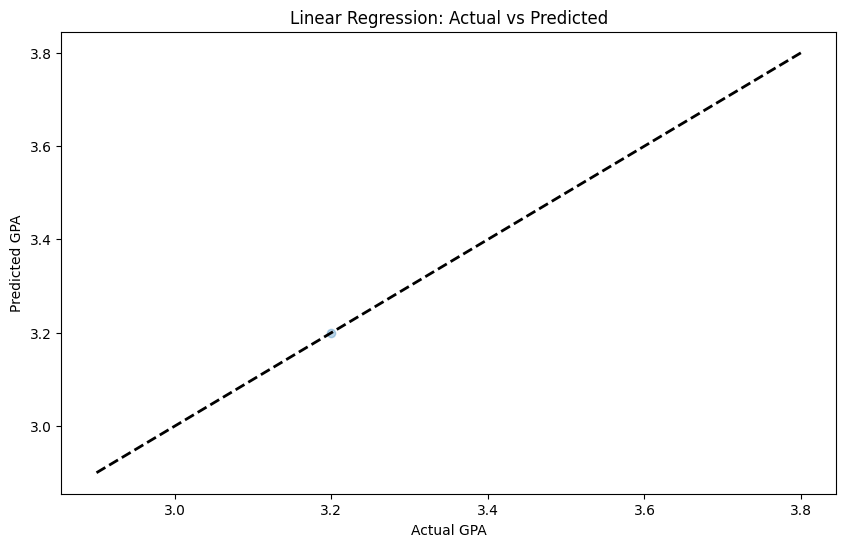

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [7]:
# %%
# Model Training
models = {
    'Linear Regression': LinearRegression(),
    'SGD Regression': SGDRegressor(max_iter=1000, tol=1e-3),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

    # Plot for linear regression
    if name == 'Linear Regression':
        plt.figure(figsize=(10,6))
        plt.scatter(y_test, y_pred, alpha=0.3)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
        plt.xlabel('Actual GPA')
        plt.ylabel('Predicted GPA')
        plt.title(f'{name}: Actual vs Predicted')
        plt.show()



Model Performance:
Linear Regression: MSE = 0.0000, R2 = nan
SGD Regression: MSE = 0.2219, R2 = nan
Decision Tree: MSE = 0.0900, R2 = nan
Random Forest: MSE = 0.0190, R2 = nan


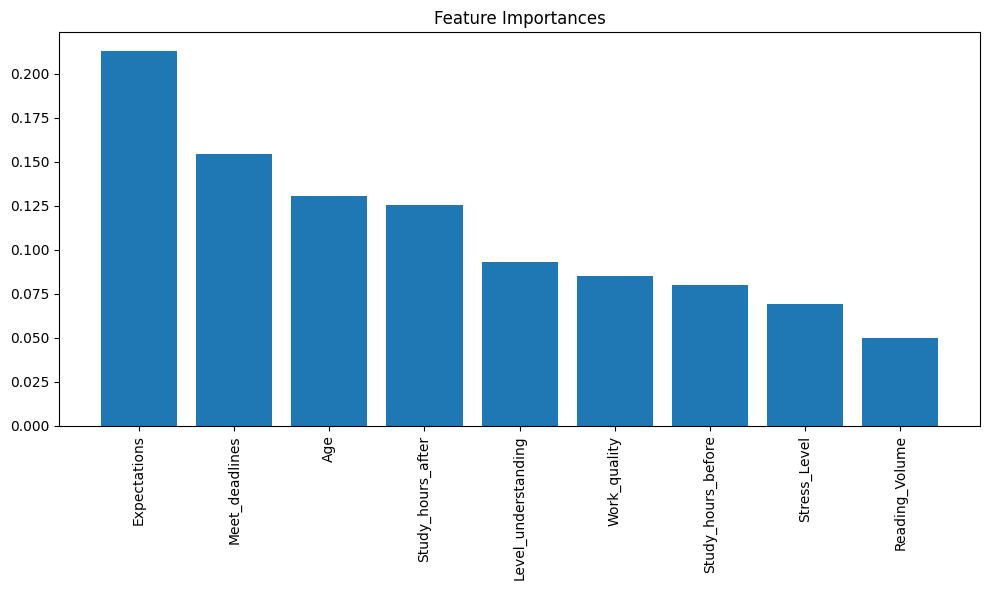

In [8]:
# %%
# Results comparison
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")

# Save best model (Random Forest)
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'best_model.pkl')

# Feature importance
plt.figure(figsize=(10,6))
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), np.array(features)[indices], rotation=90)
plt.tight_layout()
plt.show()



In [9]:
# %%
# Sample prediction
sample = X_test[0:1]
print("Sample features:\n", pd.DataFrame(scaler.inverse_transform(sample), columns=features))
prediction = best_model.predict(sample)
print(f"\nPredicted GPA: {prediction[0]:.2f}")

Sample features:
     Age  Expectations  Reading_Volume  Meet_deadlines  Work_quality  \
0  21.0           3.0             2.0             3.0           3.0   

   Level_understanding  Study_hours_before  Study_hours_after  Stress_Level  
0                  3.0                20.0               30.0           4.0  

Predicted GPA: 3.34
